Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [284]:
#Getting necessary imports
import pandas as pd

Getting part 1 data, **citybikes_vancouver.csv**

In [285]:
#load city_bikes_vancouver.csv
cb_vancouver = pd.read_csv('../data/citybikes_vancouver.csv')

Getting part 2 data

1. Foursquare
2. Yelp

In [286]:
# Foursquare
#load cb_fsq_vancouver.csv
cb_fsq_vancouver = pd.read_csv('../data/cb_fsq_vancouver.csv')
#load cb_fsq_vancouver_tips
cb_fsq_vancouver_tips = pd.read_csv('../data/cb_fsq_tips_vancouver.csv')

In [287]:
#get the count of fsq_id in tips
tips_count = cb_fsq_vancouver_tips.groupby('fsq_id').size().reset_index(name='review_count')

#merge cb_fsq_vancouver and tips_count
cb_fsq_vancouver = pd.merge(cb_fsq_vancouver, tips_count, on='fsq_id', how='left')

In [288]:
#round lat and long to 3 decimal places
cb_fsq_vancouver['lat'] = cb_fsq_vancouver['lat'].round(3)
cb_fsq_vancouver['long'] = cb_fsq_vancouver['long'].round(3)

cb_fsq_vancouver['lat'].head()

0    49.263
1    49.262
2    49.263
3    49.263
4    49.263
Name: lat, dtype: float64

In [289]:
#get postal codes from address
cb_fsq_vancouver['postal_code'] = cb_fsq_vancouver['address'].str.split(',').str[-1].str.strip()
#remove 'Vancouver BC' from address
cb_fsq_vancouver['postal_code'] = cb_fsq_vancouver['postal_code'].str.replace('Vancouver BC', '')
#remove space
cb_fsq_vancouver['postal_code'] = cb_fsq_vancouver['postal_code'].str.replace(' ','')

cb_fsq_vancouver['postal_code'].head()

0    V5Z3Y6
1    V5Z1K9
2    V5Y1R4
3    V5T1X5
4    V5Z1E9
Name: postal_code, dtype: object

In [290]:
# from address extract number
cb_fsq_vancouver['number'] = cb_fsq_vancouver['address'].str.split(' ').str[0]

# remove string from number and save only integers
cb_fsq_vancouver['number'] = cb_fsq_vancouver['number'].str.replace('[^0-9]','')

cb_fsq_vancouver['number'].head()

C:\Users\milan\AppData\Local\Temp\ipykernel_2384\923451847.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  cb_fsq_vancouver['number'] = cb_fsq_vancouver['number'].str.replace('[^0-9]','')


0    2559
1     501
2     451
3     530
4     532
Name: number, dtype: object

In [291]:
#Yelp
#load cb_yelp_vancouver.csv
cb_yelp_vancouver = pd.read_csv('../data/cb_yelp_vancouver.csv')

In [292]:
#round the latitude and longitude to 2 decimal places
cb_yelp_vancouver['lat'] = cb_yelp_vancouver['lat'].round(3)
cb_yelp_vancouver['long'] = cb_yelp_vancouver['long'].round(3)
#drop square brackets and single quotes from the address column
cb_yelp_vancouver['address'] = cb_yelp_vancouver['address'].str.replace('[','').str.replace(']','').str.replace("'",'')

cb_yelp_vancouver.head()


C:\Users\milan\AppData\Local\Temp\ipykernel_2384\2726789357.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cb_yelp_vancouver['address'] = cb_yelp_vancouver['address'].str.replace('[','').str.replace(']','').str.replace("'",'')


,title,name,address,lat,long,rating,review_count,site,cb_id
0,Mexican,La Taqueria Pinche Taco Shop,"2450 Yukon Street, Vancouver, BC V5Z 3V6, Canada",49.264,-123.113,4.0,680,Yelp,cb_0
1,Noodles,Peaceful Restaurant,"110-532 W Broadway, Vancouver, BC V5Z 1E9, Canada",49.263,-123.116,3.5,620,Yelp,cb_0
2,Cafes,Marulilu Cafe,"451 W Broadway, Vancouver, BC V5Y 1R4, Canada",49.263,-123.114,4.0,284,Yelp,cb_0
3,Japanese,Saku,"548 W Broadway, Vancouver, BC V5Z 1E9, Canada",49.263,-123.117,4.5,202,Yelp,cb_0
4,Soup,Hokkaido Ramen Santouka,"558 W Broadway, Vancouver, BC V5Z 1E9, Canada",49.263,-123.117,4.0,221,Yelp,cb_0


In [293]:
#from address column get the postal code
cb_yelp_vancouver['postal_code'] = cb_yelp_vancouver['address'].str.split(',').str[-2].str.strip()
#remove 'BC' from postal_code column
cb_yelp_vancouver['postal_code'] = cb_yelp_vancouver['postal_code'].str.replace('BC','')
#remove space from postal_code column
cb_yelp_vancouver['postal_code'] = cb_yelp_vancouver['postal_code'].str.replace(' ','')

cb_yelp_vancouver.head()


,title,name,address,lat,long,rating,review_count,site,cb_id,postal_code
0,Mexican,La Taqueria Pinche Taco Shop,"2450 Yukon Street, Vancouver, BC V5Z 3V6, Canada",49.264,-123.113,4.0,680,Yelp,cb_0,V5Z3V6
1,Noodles,Peaceful Restaurant,"110-532 W Broadway, Vancouver, BC V5Z 1E9, Canada",49.263,-123.116,3.5,620,Yelp,cb_0,V5Z1E9
2,Cafes,Marulilu Cafe,"451 W Broadway, Vancouver, BC V5Y 1R4, Canada",49.263,-123.114,4.0,284,Yelp,cb_0,V5Y1R4
3,Japanese,Saku,"548 W Broadway, Vancouver, BC V5Z 1E9, Canada",49.263,-123.117,4.5,202,Yelp,cb_0,V5Z1E9
4,Soup,Hokkaido Ramen Santouka,"558 W Broadway, Vancouver, BC V5Z 1E9, Canada",49.263,-123.117,4.0,221,Yelp,cb_0,V5Z1E9


In [294]:
# from address extract number
cb_yelp_vancouver['number'] = cb_yelp_vancouver['address'].str.split(' ').str[0]

# remove string from number and save only integers
cb_yelp_vancouver['number'] = cb_fsq_vancouver['number'].str.replace('[^0-9]','')

#if there is a '-' in value then use only second value
if '-' in cb_yelp_vancouver['number']:
    cb_yelp_vancouver['number'] = cb_yelp_vancouver['number'].str.split('-').str[1]

cb_yelp_vancouver.head()

C:\Users\milan\AppData\Local\Temp\ipykernel_2384\4026550513.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  cb_yelp_vancouver['number'] = cb_fsq_vancouver['number'].str.replace('[^0-9]','')


,title,name,address,lat,long,rating,review_count,site,cb_id,postal_code,number
0,Mexican,La Taqueria Pinche Taco Shop,"2450 Yukon Street, Vancouver, BC V5Z 3V6, Canada",49.264,-123.113,4.0,680,Yelp,cb_0,V5Z3V6,2559
1,Noodles,Peaceful Restaurant,"110-532 W Broadway, Vancouver, BC V5Z 1E9, Canada",49.263,-123.116,3.5,620,Yelp,cb_0,V5Z1E9,501
2,Cafes,Marulilu Cafe,"451 W Broadway, Vancouver, BC V5Y 1R4, Canada",49.263,-123.114,4.0,284,Yelp,cb_0,V5Y1R4,451
3,Japanese,Saku,"548 W Broadway, Vancouver, BC V5Z 1E9, Canada",49.263,-123.117,4.5,202,Yelp,cb_0,V5Z1E9,530
4,Soup,Hokkaido Ramen Santouka,"558 W Broadway, Vancouver, BC V5Z 1E9, Canada",49.263,-123.117,4.0,221,Yelp,cb_0,V5Z1E9,532


In [295]:
# join cb_fsq_vancouver and cb_yelp_vancouver through cb_id, number, postal_code, lat, long
cb_fsq_yelp_vancouver = pd.merge(cb_fsq_vancouver, cb_yelp_vancouver, on=['cb_id', 'number', 'postal_code'], how='outer')

#fill Nan values with 'Not Available'
cb_fsq_yelp_vancouver = cb_fsq_yelp_vancouver.fillna('unavailable')

cb_fsq_yelp_vancouver.head()

,fsq_id,station,category,name_x,address_x,lat_x,long_x,site_x,cb_id,review_count_x,postal_code,number,title,name_y,address_y,lat_y,long_y,rating,review_count_y,site_y
0,4fd3a01be4b0540d9cb027ea,10th & Cambie,Café,Moii Cafe,"2559 Cambie St (btwn W Broadway & W 10th Ave),...",49.263,-123.115,Foursquare,cb_0,20.0,V5Z3Y6,2559,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable
1,4bc290d674a9a593788ed3f6,10th & Cambie,Banking and Finance,Vancity Savings Credit Union,"501 10th Ave W, Vancouver BC V5Z 1K9",49.262,-123.115,Foursquare,cb_0,4.0,V5Z1K9,501,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable
2,4b1db335f964a520211424e3,10th & Cambie,Café,Marulilu Cafe,"451W Broadway W (at Cambie St), Vancouver BC V...",49.263,-123.114,Foursquare,cb_0,30.0,V5Y1R4,451,Cafes,Marulilu Cafe,"451 W Broadway, Vancouver, BC V5Y 1R4, Canada",49.263,-123.114,4.0,284.0,Yelp
3,4db0b65d4df03036e8c0960c,10th & Cambie,Hair Salon,Space Salon,"530W Broadway W (btw Ash & Cambie), Vancouver ...",49.263,-123.116,Foursquare,cb_0,12.0,V5T1X5,530,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable,unavailable
4,4ab04bfaf964a520ed6620e3,10th & Cambie,Dim Sum Restaurant,Peaceful Restaurant,"532 Broadway W (btwn Cambie & Ash), Vancouver ...",49.263,-123.116,Foursquare,cb_0,10.0,V5Z1E9,532,Soup,Hokkaido Ramen Santouka,"558 W Broadway, Vancouver, BC V5Z 1E9, Canada",49.263,-123.117,4.0,221.0,Yelp


In [296]:
# drop columns that are not required
cb_fsq_yelp_vancouver = cb_fsq_yelp_vancouver.drop(['lat_x', 'long_x', 'address_x', 'number'], axis=1)



In [297]:
cb_fsq_yelp_vancouver.count()

fsq_id            7195
station           7195
category          7195
name_x            7195
site_x            7195
cb_id             7195
review_count_x    7195
postal_code       7195
title             7195
name_y            7195
address_y         7195
lat_y             7195
long_y            7195
rating            7195
review_count_y    7195
site_y            7195
dtype: int64

In [ ]:
#drop name from cb_vancouver
#cb_vancouver = cb_vancouver.drop('name', axis=1)

#join cb_fsq_yelp_vancouver and cb_vancouver through cb_id
main_df = pd.merge(cb_fsq_yelp_vancouver, cb_vancouver, on='cb_id', how='outer')

#main_df.head(20)

In [299]:
#drop all rows where anything is unavailable

main_df.count()

fsq_id            7195
station           7195
category          7195
name_x            7195
site_x            7195
cb_id             7195
review_count_x    7195
postal_code       7195
title             7195
name_y            7195
address_y         7195
lat_y             7195
long_y            7195
rating            7195
review_count_y    7195
site_y            7195
name              7195
latitude          7195
longitude         7195
free_bikes        7195
dtype: int64

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [301]:
# using matplotlib to plot the data
import matplotlib.pyplot as plt

In [321]:
#plot a bar chart to show difference between yelp and foursquare reviews
#count fsq_id and store it in a variable as integer where fsq_id is not unavailable
y1 = main_df[main_df['fsq_id'] != 'unavailable'].groupby('fsq_id').size().reset_index(name='count')
#sum y1 and store it in a self
y1 = y1['count'].sum()

#count ratings and store it in a variable where ratings is not unavailable
y2 = main_df[main_df['rating'] != 'unavailable'].groupby('rating').size().reset_index(name='count')
y2 = y2['count'].sum()

#x is total size of main_df
x = main_df.groupby('cb_id').size().reset_index(name='count')
x = x['count'].sum()

y3 = y1+y2-x


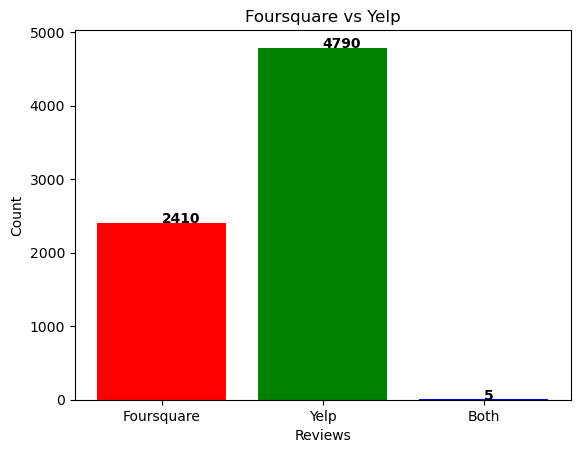

In [324]:

#plot the bar chart y1 as foursquare, y2 as yelp, y3 as Both
plt.bar(['Foursquare', 'Yelp', 'Both'], [y1, y2, y3], color=['red', 'green', 'blue'])
plt.title('Foursquare vs Yelp')
plt.xlabel('Reviews')
plt.ylabel('Count')
#show no of reviews for foursquare, yelp and both
for i, v in enumerate([y1, y2, y3]):
    plt.text(i, v, str(v), color='black', fontweight='bold')
    
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [326]:
import sqlite3

In [327]:
# create a sqlite3 database named 'vancouver.db'
conn = sqlite3.connect('../data/vancouver.db')

In [ ]:
# create a table cb_vancouver in vancouver.db
cb_vancouver.to_sql('cb_vancouver', conn, if_exists='replace', index=False)


In [342]:
# create a table cb_fsq_vancouver in vancouver.db
cb_fsq_vancouver.to_sql('cb_fsq_vancouver', conn, if_exists='replace', index=False)


2410

In [343]:
# create a table cb_fsq_vancouver_tips in vancouver.db
cb_fsq_vancouver_tips.to_sql('cb_fsq_vancouver_tips', conn, if_exists='replace', index=False)


16023

In [344]:
# create a table cb_yelp_vancouver in vancouver.db
cb_yelp_vancouver.to_sql('cb_yelp_vancouver', conn, if_exists='replace', index=False)


4788

Look at the data before and after the join to validate your data.

In [347]:
# create table main_df in vancouver.db
main_df.to_sql('main_df', conn, if_exists='replace', index=False)


7195